In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [8]:
DATA_PATH = "../data/raw/tickets.csv"
df = pd.read_csv(DATA_PATH)

df.head()


,ticket_id,subject,description,channel,category,priority,created_at,customer_plan,sla_breached,escalated
0,1,Unable to login with my account,Unable to login with my account. This issue is...,web,Login,Medium,2026-01-30 03:53:16,Pro,0,0
1,2,Password reset link not working,Password reset link not working. This issue is...,web,Login,Medium,2026-01-08 17:53:16,Enterprise,0,0
2,3,Unable to login with my account,Unable to login with my account. This issue is...,email,Login,High,2026-02-04 04:53:16,Free,0,0
3,4,Password reset link not working,Password reset link not working. This issue is...,web,Login,Medium,2026-01-14 14:53:16,Free,0,0
4,5,Account locked after multiple attempts,Account locked after multiple attempts. This i...,chat,Login,Medium,2026-01-29 10:53:16,Enterprise,0,0


In [9]:
print("Shape:", df.shape)
df.info()


Shape: (1000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ticket_id      1000 non-null   int64 
 1   subject        1000 non-null   object
 2   description    1000 non-null   object
 3   channel        1000 non-null   object
 4   category       1000 non-null   object
 5   priority       1000 non-null   object
 6   created_at     1000 non-null   object
 7   customer_plan  1000 non-null   object
 8   sla_breached   1000 non-null   int64 
 9   escalated      1000 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 78.2+ KB


In [10]:
df.isnull().sum()

ticket_id        0
subject          0
description      0
channel          0
category         0
priority         0
created_at       0
customer_plan    0
sla_breached     0
escalated        0
dtype: int64

🔹 Category Distribution

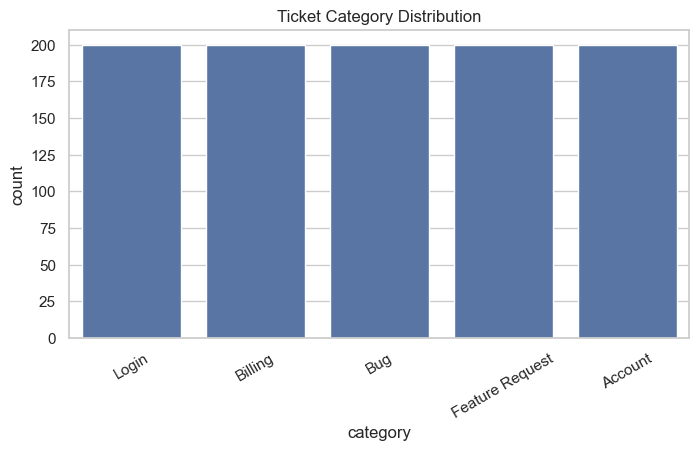

In [11]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="category")
plt.title("Ticket Category Distribution")
plt.xticks(rotation=30)
plt.show()


🔹 Priority Distribution

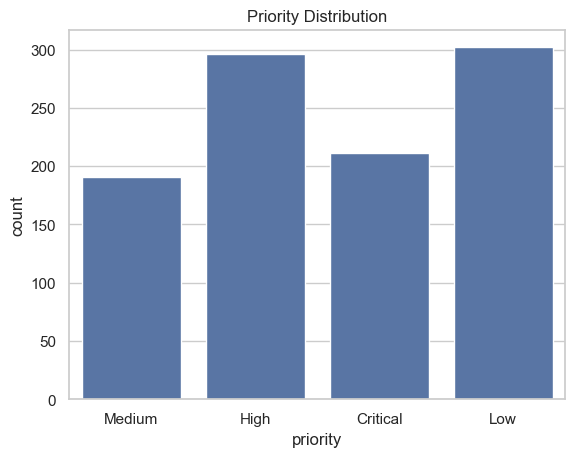

In [12]:
sns.countplot(data=df, x="priority")
plt.title("Priority Distribution")
plt.show()


🔹 Ticket Channels

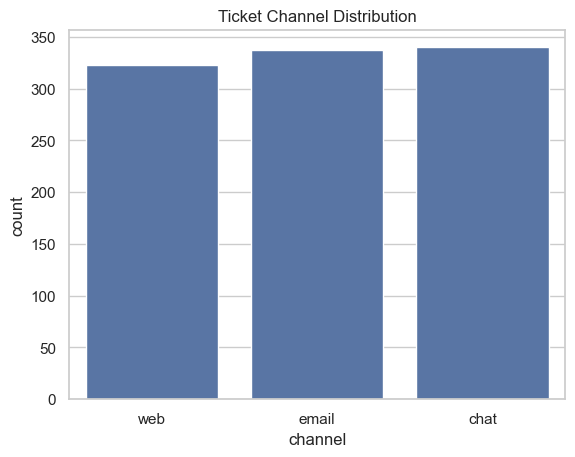

In [13]:
sns.countplot(data=df, x="channel")
plt.title("Ticket Channel Distribution")
plt.show()


🔹 Customer Plan

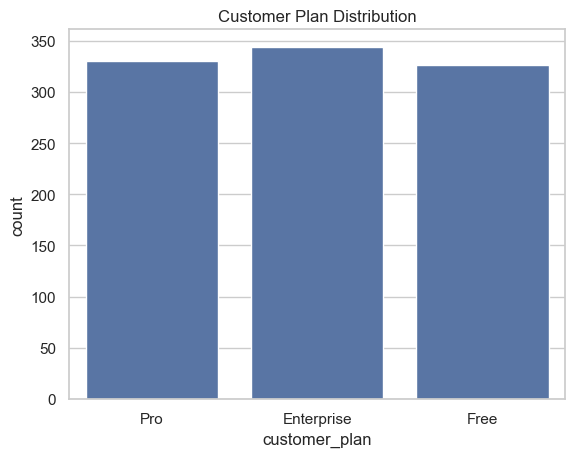

In [14]:
sns.countplot(data=df, x="customer_plan")
plt.title("Customer Plan Distribution")
plt.show()


🔹 SLA Breach Rate

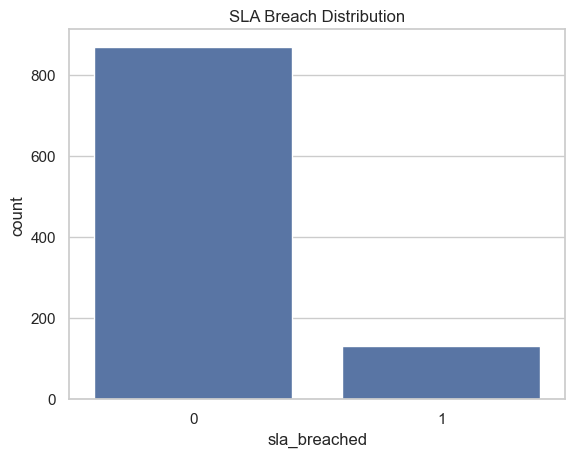

In [15]:
sns.countplot(data=df, x="sla_breached")
plt.title("SLA Breach Distribution")
plt.show()

🔹 Escalation vs Plan

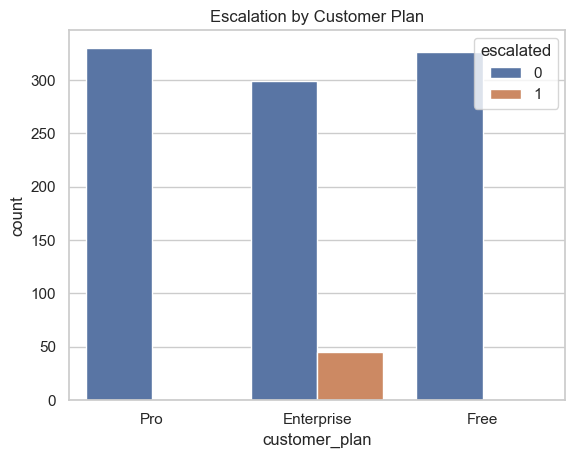

In [16]:
sns.countplot(data=df, x="customer_plan", hue="escalated")
plt.title("Escalation by Customer Plan")
plt.show()


🔹 Description Length

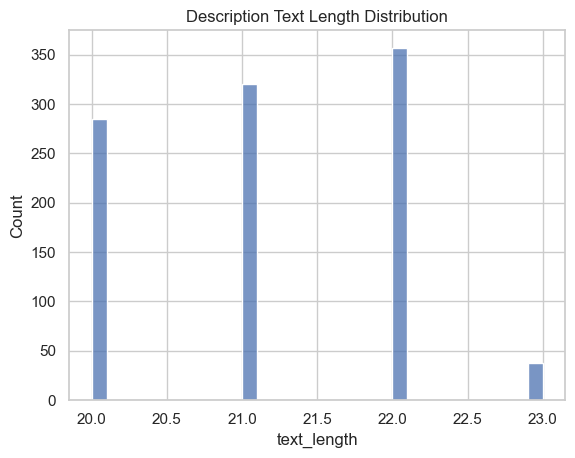

In [17]:
df["text_length"] = df["description"].apply(lambda x: len(x.split()))

sns.histplot(df["text_length"], bins=30)
plt.title("Description Text Length Distribution")
plt.show()


EDA Summary

Dataset contains 1,000 tickets with balanced categories

No missing values found in critical columns

Text fields contain sufficient length for NLP modeling

SLA breaches and escalations are logically correlated with priority and customer plan

Dataset is suitable for classification and prediction tasks